# **Group - 4 Aspect-Based Sentiment Analysis on Starbucks Reviews**

Team Details:

Deepu Gondhi - 11737274

Kaushik Apoori - 11705023

Manumitha Kamarapu - 11684243

Teena Poorna Sudheera Maganti - 11755850

In [13]:
!pip install transformers pandas numpy matplotlib seaborn


In [14]:
import pandas as pan

# Loading the dataset of starbucks
df = pd.read_csv('/content/reviews_data.csv')
print(df.head())


       name           location                     Date  Rating  \
0     Helen  Wichita Falls, TX  Reviewed Sept. 13, 2023     5.0   
1  Courtney         Apopka, FL   Reviewed July 16, 2023     5.0   
2  Daynelle  Cranberry Twp, PA    Reviewed July 5, 2023     5.0   
3    Taylor        Seattle, WA    Reviewed May 26, 2023     5.0   
4   Tenessa        Gresham, OR   Reviewed Jan. 22, 2023     5.0   

                                              Review  \
0  Amber and LaDonna at the Starbucks on Southwes...   
1  ** at the Starbucks by the fire station on 436...   
2  I just wanted to go out of my way to recognize...   
3  Me and my friend were at Starbucks and my card...   
4  I’m on this kick of drinking 5 cups of warm wa...   

                                         Image_Links  
0                                      ['No Images']  
1                                      ['No Images']  
2  ['https://media.consumeraffairs.com/files/cach...  
3                                      [

In [15]:
import pandas as pan
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Loading stopwords and wordnet
nltk.download('stopwords')
nltk.download('wordnet')

df.dropna(subset=['Review', 'Rating'], inplace=True)

# Initializing lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text preprocessing methodology
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

# Applying the text preprocessing
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)

# timestamps normalising
df['Date'] = df['Date'].str.replace('Reviewed ', '')
df['Date'] = pan.to_datetime(df['Date'], format='%b %d, %Y', errors='coerce')

# Verify results
print(df[['Date', 'Cleaned_Review']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


        Date                                     Cleaned_Review
0        NaT  amber ladonna starbucks southwest parkway alwa...
1        NaT  starbucks fire station 436 altamonte spring fl...
2        NaT  wanted go way recognize starbucks employee bil...
3 2023-05-26  friend starbucks card didnt work thankful work...
4        NaT  im kick drinking 5 cup warm water work instaca...


In [16]:
from transformers import pipeline

# pipeline for sentiment analysis
sentiment_analyzer = pipeline('sentiment-analysis')

# Analyzing the sentiments
df['Sentiment'] = df['Cleaned_Review'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
print(df[['Cleaned_Review', 'Sentiment']].head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                      Cleaned_Review Sentiment
0  amber ladonna starbucks southwest parkway alwa...  POSITIVE
1  starbucks fire station 436 altamonte spring fl...  POSITIVE
2  wanted go way recognize starbucks employee bil...  NEGATIVE
3  friend starbucks card didnt work thankful work...  NEGATIVE
4  im kick drinking 5 cup warm water work instaca...  POSITIVE


In [17]:
# extracting the aspects
def extract_aspects(review):
    aspects = []
    if 'service' in review:
        aspects.append('Service Quality')
    if 'product' in review:
        aspects.append('Product Quality')
    if 'price' in review:
        aspects.append('Pricing')
    return aspects

df['Aspects'] = df['Cleaned_Review'].apply(extract_aspects)


<ipython-input-18-703a6b029edb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', ax=axes[0], palette='viridis')
<ipython-input-18-703a6b029edb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aspect_counts.index, y=aspect_counts.values, ax=axes[1], palette='coolwarm')


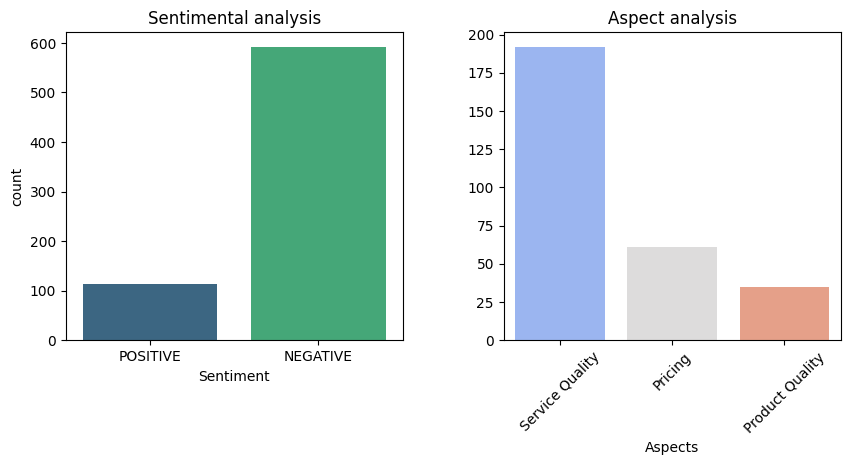

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# graph for sentiment analysis
sns.countplot(data=df, x='Sentiment', ax=axes[0], palette='viridis')
axes[0].set_title('Sentimental analysis')

# graph for Aspect analysis
aspect_counts = df.explode('Aspects')['Aspects'].value_counts()
sns.barplot(x=aspect_counts.index, y=aspect_counts.values, ax=axes[1], palette='coolwarm')
axes[1].set_title('Aspect analysis')
axes[1].tick_params(axis='x', rotation=45)
plt.subplots_adjust(wspace=0.3)


plt.show()


In [19]:
insights = {
    '1': 'Improve service quality by training staff based on customer feedback.',
    '2': 'Expand product offerings based on popular customer preferences.',
    '3': 'Enhance store ambiance to improve customer experience.',
    '4': 'Adjust pricing strategies based on customer feedback on pricing.',
    '5': 'Focus on locations with high dissatisfaction to improve overall ratings.'
}
